#### Analysis running ecFactory 100 times to predict spermidine targets

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir(r'D:\code\github\CellFactory-ecYeastGEM')

In [9]:
def merge_result(results_dir,type,save=False):
    '''Merge all results from n runs into one dataframe'''
    # list all directory in results_dir
    dirs=os.listdir(results_dir)
    if type in ['L1','L2','L3']:
        file_name=f'candidates_{type}.txt'
    else:
        file_name=f'{type}.txt'
    df=pd.read_csv(os.path.join(results_dir,file_name),sep='\t',index_col=0)
    common_target=df.index.tolist()
    targets_frequency={target:1 for target in common_target}
    count=0
    for dir in dirs:
        # check if it is a directory
        if os.path.isdir(os.path.join(results_dir,dir)):
            file_path=os.path.join(results_dir,dir,file_name)
            if os.path.exists(file_path):
                df2=pd.read_csv(file_path,sep='\t',index_col=0)
                common_target=list(set(common_target).intersection(df2.index.tolist()))
                df=df.loc[common_target]
                count+=1
                for target in df2.index:
                    if target in list(targets_frequency.keys()):
                        targets_frequency[target]+=1
                    else:
                        targets_frequency[target]=1
    # save result
    if save:
        df.to_csv(os.path.join(results_dir,f'candidates_{type}_merged.txt'),sep='\t')
    df_freq=pd.Series(targets_frequency)
    df_freq=df_freq/(count+1)
    return df,df_freq

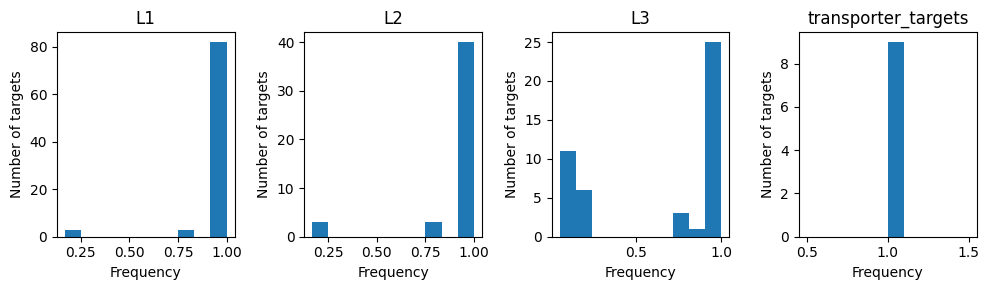

In [17]:
results_dir=r'results/production_targets/spermidine_targets'
type_list=['L1','L2','L3','transporter_targets']
# create subplots for each type
fig,axes=plt.subplots(1,len(type_list),figsize=(10,3))

for type in type_list:
    df,df_freq=merge_result(results_dir,type,save=True)
    # plot the frequency of each target
    df_freq.plot(kind='hist',ax=axes[type_list.index(type)])
    axes[type_list.index(type)].set_title(type)
    axes[type_list.index(type)].set_ylabel('Number of targets')
    axes[type_list.index(type)].set_xlabel('Frequency')
plt.tight_layout()
plt.show()